In [12]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

PTH = "lthemyr@slurm.ircad.fr"

In [38]:
def load_file(f):
    os.system("scp {}:{} ./tmp/".format(PTH, f))
    with open("./tmp/{}".format(f.split('/')[-1]), 'r') as file:
        txt = file.read()
    os.system("rm ./tmp/{}".format(f.split('/')[-1]))
    return txt

def extract_train_loss(f, ret={}):
    txt = load_file("usseg/logs/{}".format(f))
    txt = txt.split("Start Training ...")[1]
    txt = txt.split("Epoch:")[1:]
    
    for i in txt:
        tmp = i.split("\n")
        ret[int(tmp[0].replace(' ', ''))] = float(tmp[1].split(",")[0].split(': ')[1])
        
    return ret

def plot_train_loss(fs):
    tr = {}
    for i in fs:
        tr = extract_train_loss(i, tr)
    
    plt.plot(list(tr.keys()), list(tr.values()))
    #plt.show()

#print(load_file("usseg/logs/cv2_nnunet_256_mda.out"))
#txt = extract_train_loss("cv2_nnunet_256_mda.out")
#print(txt)

#plot_train_loss(["cv2_nnunet_256_mda.out"])

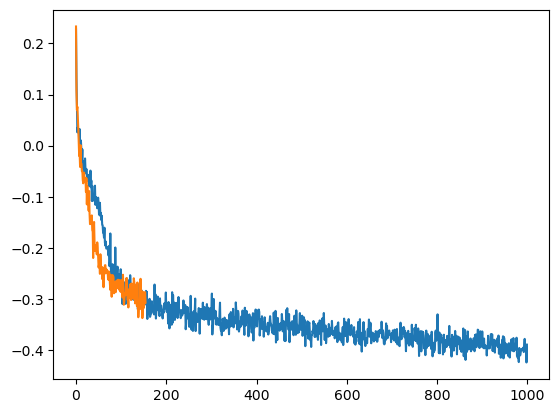

In [39]:
plot_train_loss(["cv1_nnunet_256.out", "cv1_nnunet_256_continue.out"])
plot_train_loss(["cv2_nnunet_256_mda.out"])
plt.show()
